### Import Python Modules

First, I import the primary modules that will be used in this project.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the Data
I have been given two CSV files:
- species_info.csv - contains data about different species and their conservation status
- observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.

In [2]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

### Data Characteristics

In [3]:
display(species.head())
display(observations.head())

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species.info()
print()
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


The provided datasets have the following columns of data:
- species_info.csv:
    - category - class of animal
    - scientific_name - the scientific name of each species
    - common_name - the common names of each species
    - conservation_status - each species’ current conservation status
- observations.csv:
    - scientific_name - the scientific name of each species
    - park_name - Park where species were found
    - observations - the number of times each species was observed at park
    
    
    
In the 'species_info' dataset there are null values in the 'conservation_status' column. Probably, these animals just don't have any conservation status. In other words, there are 191 species under protection and 5633 species not under concern.

The 'observations' dataset has no null values.

### Summary statistics

#### Species

In [5]:
display(species.describe())

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


#### Observations

In [6]:
display(observations.describe())
display(observations.describe(include='O'))

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


,scientific_name,park_name
count,23296,23296
unique,5541,4
top,Myotis lucifugus,Great Smoky Mountains National Park
freq,12,5824


### Analysis and visualisations

#### Species

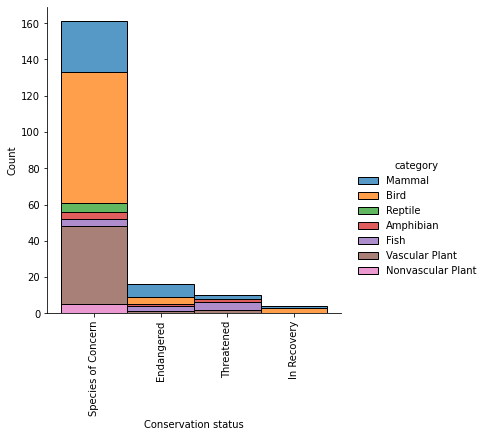

In [7]:
sns.displot(data=species, hue="category", x="conservation_status", multiple="stack")
plt.xlabel('Conservation status')
plt.xticks(rotation = 90)
plt.show()

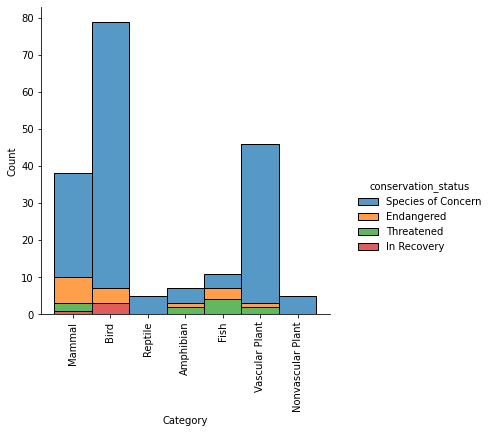

In [8]:
sns.displot(data=species, x="category", hue="conservation_status", multiple="stack")
plt.xlabel('Category')
plt.xticks(rotation = 90)
plt.show()

In [9]:
conservation = species.groupby(by=species.conservation_status, as_index=False).count()
conservation = conservation.sort_values(by='category', ascending=False)
display(conservation)

,conservation_status,category,scientific_name,common_names
2,Species of Concern,161,161,161
0,Endangered,16,16,16
3,Threatened,10,10,10
1,In Recovery,4,4,4


In [10]:
conservation_cat = species.groupby(by=[species.conservation_status, species.category], as_index=False).count()
conservation_cat = conservation_cat.sort_values(by='category', ascending=False)
conservation_cat.sort_values(by=['conservation_status', 'scientific_name'], ascending=False, inplace=True)
display(conservation_cat)

,conservation_status,category,scientific_name,common_names
15,Threatened,Fish,4,4
17,Threatened,Vascular Plant,2,2
16,Threatened,Mammal,2,2
14,Threatened,Amphibian,2,2
8,Species of Concern,Bird,72,72
13,Species of Concern,Vascular Plant,43,43
10,Species of Concern,Mammal,28,28
12,Species of Concern,Reptile,5,5
11,Species of Concern,Nonvascular Plant,5,5
9,Species of Concern,Fish,4,4


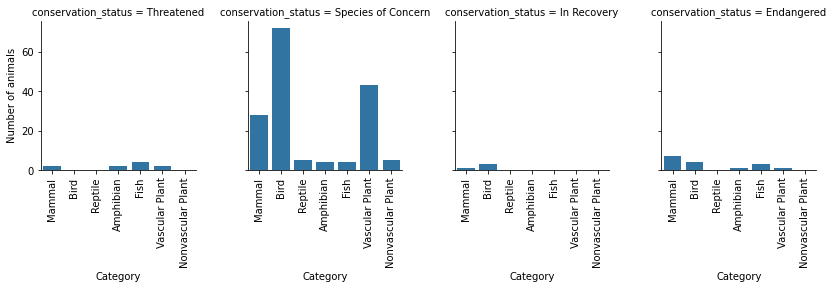

In [11]:
categories = species.category.unique()
g = sns.FacetGrid(conservation_cat, col='conservation_status')
g.map(sns.barplot, 'category', 'scientific_name', order=categories)
g.set_xlabels('Category')
g.set_ylabels('Number of animals')
g.set_xticklabels(rotation = 90)
plt.show()

Most of the animals (161) are considered as 'Species of Concern'. This group contains mostly birds (72 species), vascular plants (43) and mammals (28). Then there are 16 'Endangered' species, 10 'Threatened' species and 4 'In Recovery' species.

Most endangered animals are mammals (7). There are also 4 endangered birds, 3 fish, 1 vascular plant and 1 amphibian.

On the other hand, there are 4 threatened fish and 2 threatened mammals, 2 vascular plants and 2 amphibians.

#### Observations

In [12]:
observations.groupby(by=['park_name']).count()

,scientific_name,observations
park_name,,
Bryce National Park,5824,5824
Great Smoky Mountains National Park,5824,5824
Yellowstone National Park,5824,5824
Yosemite National Park,5824,5824


In [13]:
observations.groupby(by=['park_name']).sum()

,observations
park_name,
Bryce National Park,576025
Great Smoky Mountains National Park,431820
Yellowstone National Park,1443562
Yosemite National Park,863332


Observations were made in 4 parks. There were recognized 5824 species in each park. Yellowstone National Park observators reported the most animals (1,443,562).

In [14]:
observations_cat = observations.merge(species)

In [15]:
observations_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [16]:
observations_cat.groupby(by=['park_name']).count()

,scientific_name,observations,category,common_names,conservation_status
park_name,,,,,
Bryce National Park,6408,6408,6408,6408,220
Great Smoky Mountains National Park,6408,6408,6408,6408,220
Yellowstone National Park,6408,6408,6408,6408,220
Yosemite National Park,6408,6408,6408,6408,220


In [17]:
observations_cat.groupby(by=['category','park_name']).count()

scientific_name  \
category          park_name                                              
Amphibian         Bryce National Park                               82   
                  Great Smoky Mountains National Park               82   
                  Yellowstone National Park                         82   
                  Yosemite National Park                            82   
Bird              Bryce National Park                              591   
                  Great Smoky Mountains National Park              591   
                  Yellowstone National Park                        591   
                  Yosemite National Park                           591   
Fish              Bryce National Park                              131   
                  Great Smoky Mountains National Park              131   
                  Yellowstone National Park                        131   
                  Yosemite National Park                           131   
Mammal            Bryce National Park                              300   
                  Great Smoky Mountains National Park              300   
                  Yellowstone National Park                        300   
                  Yosemite National Park                           300   
Nonvascular Plant Bryce National Park                              333   
                  Great Smoky Mountains National Park              333   
                  Yellowstone National Park                        333   
                  Yosemite National Park                           333   
Reptile           Bryce National Park                               81   
                  Great Smoky Mountains National Park               81   
                  Yellowstone National Park                         81   
                  Yosemite National Park                            81   
Vascular Plant    Bryce National Park                             4890   
                  Great Smoky Mountains National Park             4890   
                  Yellowstone National Park                       4890   
                  Yosemite National Park                          4890   

                                                       observations  \
category          park_name                                           
Amphibian         Bryce National Park                            82   
                  Great Smoky Mountains National Park            82   
                  Yellowstone National Park                      82   
                  Yosemite National Park                         82   
Bird              Bryce National Park                           591   
                  Great Smoky Mountains National Park           591   
                  Yellowstone National Park                     591   
                  Yosemite National Park                        591   
Fish              Bryce National Park                           131   
                  Great Smoky Mountains National Park           131   
                  Yellowstone National Park                     131   
                  Yosemite National Park                        131   
Mammal            Bryce National Park                           300   
                  Great Smoky Mountains National Park           300   
                  Yellowstone National Park                     300   
                  Yosemite National Park                        300   
Nonvascular Plant Bryce National Park                           333   
                  Great Smoky Mountains National Park           333   
                  Yellowstone National Park                     333   
                  Yosemite National Park                        333   
Reptile           Bryce National Park                            81   
                  Great Smoky Mountains National Park            81   
                  Yellowstone National Park                      81   
                  Yosemite National Park                   

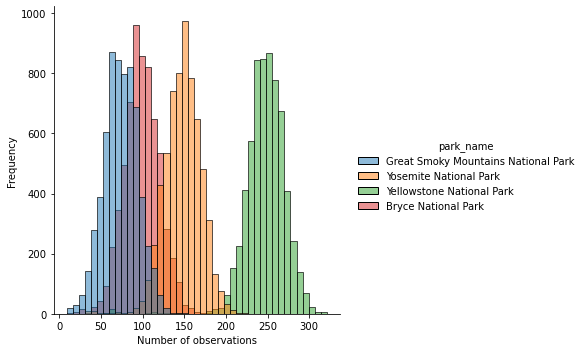

In [18]:
sns.displot(data=observations_cat, x='observations', hue="park_name")
plt.xlabel('Number of observations')
plt.ylabel('Frequency')
plt.show()

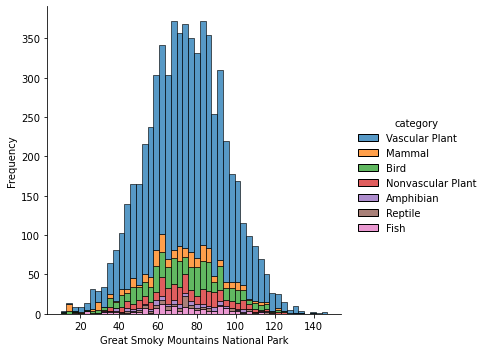

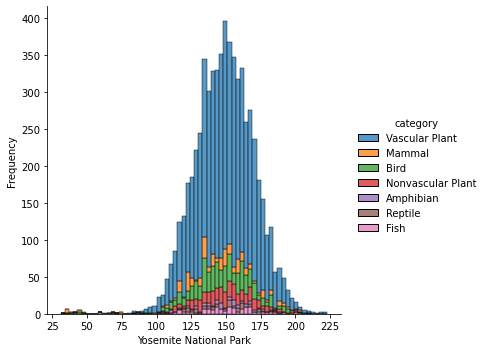

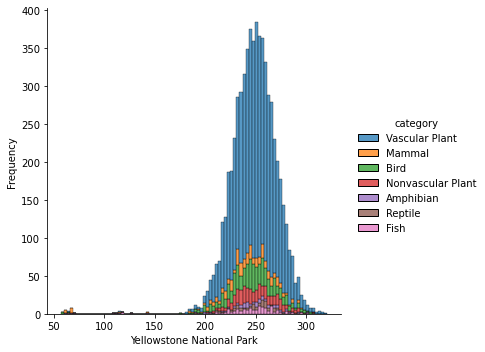

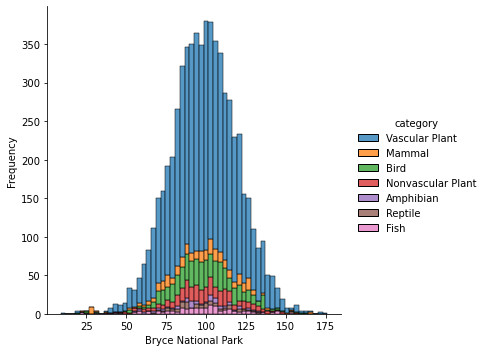

In [19]:
for park in observations_cat.park_name.unique().tolist():
    sns.displot(data=observations_cat[observations_cat.park_name==park], x='observations', hue="category", multiple="stack")
    plt.xlabel(park)
    plt.ylabel('Frequency')
    plt.show()

At each park, vascular plants were spotted the most times. Second most frequent species were birds, then nonvascular plants.

### Plants

In [20]:
categories.tolist()

['Mammal',
 'Bird',
 'Reptile',
 'Amphibian',
 'Fish',
 'Vascular Plant',
 'Nonvascular Plant']

In [21]:
plants_cats = [elem for elem in categories.tolist() if 'plant' in elem.lower()]
plants_cats

['Vascular Plant', 'Nonvascular Plant']

In [22]:
plants = observations_cat[observations_cat.category.isin(plants_cats)]
plants

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
...,...,...,...,...,...,...
25623,Ranunculus hebecarpus,Yellowstone National Park,270,Vascular Plant,"Delicate Buttercup, Downy-Fruit Buttercup",NaN
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",NaN


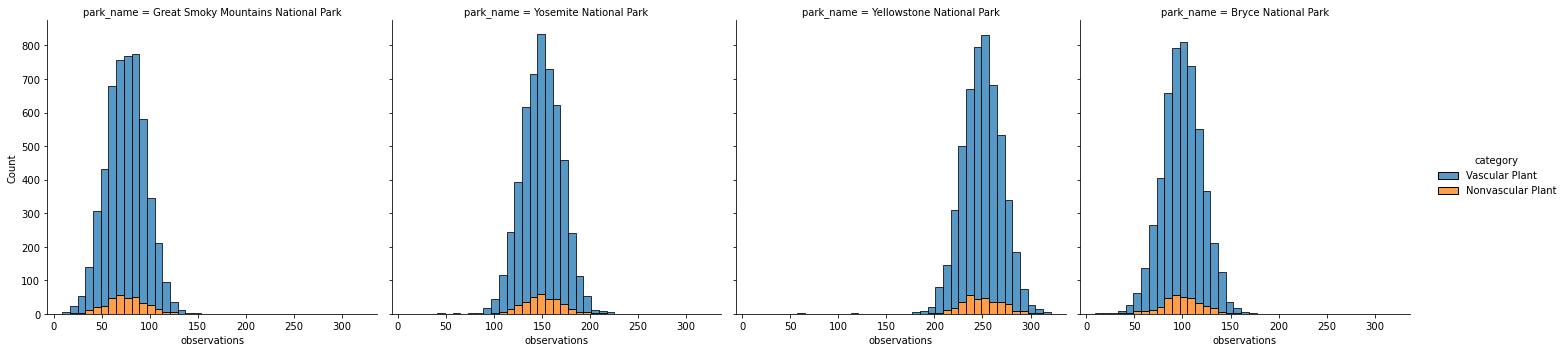

In [23]:
sns.displot(data=plants, x='observations', hue="category", multiple="stack", col="park_name")
plt.show()

In [24]:
chars = ['"',"'s","''",'.',',','-','+','_',';',':','!','@','#','$','%','^','&','*','(',')','?','<','>']
def string_cleaning(x):
    for c in chars:
        x = x.replace(c,' ')
    x = x.split()
    x = list(set(x))
    return np.array(x)

In [25]:
def find_common_names(df):
    common_names = df['common_names'].apply(lambda x: string_cleaning(str(x)))
    common_names_dict = {}
    for species in common_names:
        for name in species:
            if not name in common_names_dict:
                common_names_dict[name] = 1
            else:
                common_names_dict[name] += 1
    return pd.DataFrame(common_names_dict.items(), columns=['name','occurrence']).sort_values(by='occurrence',ascending=False).reset_index(drop=True)

In [26]:
plants_common_names = find_common_names(plants)
display(plants_common_names.head(10))

,name,occurrence
0,Moss,1168
1,Sedge,964
2,Common,844
3,Grass,760
4,Mountain,568
5,White,468
6,Leaf,448
7,Wild,444
8,Yellow,420
9,Leaved,400


C:\Users\Martyna\AppData\Local\Temp\ipykernel_20760\3870676537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plants['is_moss'] = plants.common_names.str.contains(r"\bMoss\b", regex = True)


,scientific_name,observations,is_moss
0,Lycopodium annotinum,1064,8
1,Ulota crispa,679,4
2,Anomodon attenuatus,674,4
3,Pylaisiella polyantha,669,4
4,Dicranum polysetum,652,4
5,Steerecleus serrulatus,651,4
6,Zygodon viridissimus var. rupestris,651,4
7,Homalia trichomanoides,649,4
8,Anomodon rugelii,648,4
9,Mnium stellare,646,4


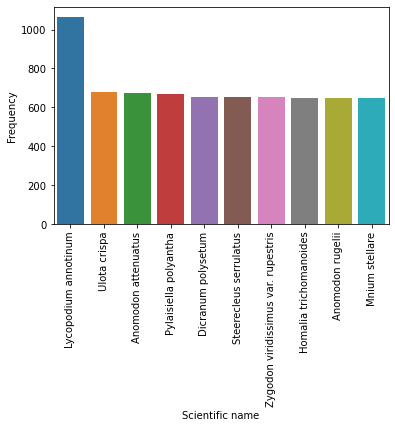

In [27]:
plants['is_moss'] = plants.common_names.str.contains(r"\bMoss\b", regex = True)
common_moss_plants = plants[plants['is_moss']==True].groupby(by='scientific_name', as_index=False).sum().sort_values('observations',ascending=False).reset_index(drop=True).head(10)
display(common_moss_plants)

sns.barplot(data=common_moss_plants, x='scientific_name', y='observations')
plt.xlabel('Scientific name')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

In [28]:
plants.scientific_name.nunique()

4595

In [29]:
plants.common_names[plants.scientific_name=='Lycopodium annotinum'].unique()

array(['Stiff Clubmoss', 'Clubmoss, Stiff Club Moss, Stiff Clubmoss'],
      dtype=object)

4595 different plant species are observed in these four parks (20,892 notes). Most of the spotted plants correlated with moss. The plant scientifically named 'Lycopodium annotinum', usually called 'Clubmoss', 'Stiff Club Moss' or 'Stiff Clubmoss' has been spotted 1064 times.

### Animals

In [30]:
animals_cats = [elem for elem in categories.tolist() if 'plant' not in elem.lower()]
animals_cats

['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish']

In [31]:
animals = observations_cat[observations_cat.category.isin(animals_cats)]
animals

,scientific_name,park_name,observations,category,common_names,conservation_status
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,NaN
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,NaN
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,NaN
24,Spizella pusilla,Yellowstone National Park,228,Bird,Field Sparrow,NaN
...,...,...,...,...,...,...
25563,Desmognathus marmoratus,Yosemite National Park,153,Amphibian,Shovel-Nosed Salamander,NaN
25624,Gulo gulo,Great Smoky Mountains National Park,90,Mammal,Wolverine,NaN
25625,Gulo gulo,Bryce National Park,114,Mammal,Wolverine,NaN
25626,Gulo gulo,Yellowstone National Park,270,Mammal,Wolverine,NaN


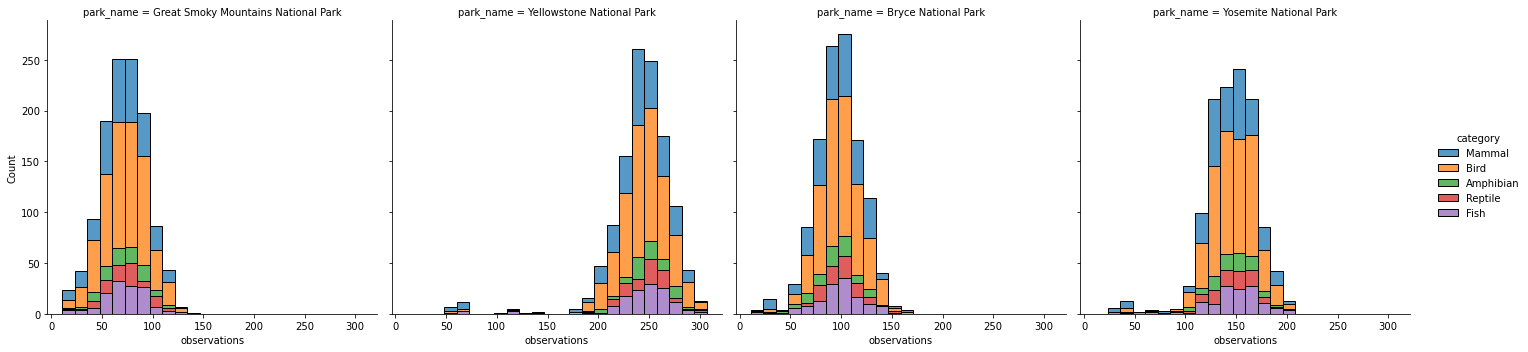

In [32]:
sns.displot(data=animals, x='observations', hue="category", multiple="stack", col="park_name")
plt.show()

In [33]:
animals_common_names = find_common_names(animals)
display(animals_common_names.head(10))

,name,occurrence
0,Northern,260
1,Warbler,236
2,American,212
3,Common,184
4,Gray,176
5,Black,172
6,Eastern,168
7,Salamander,164
8,Red,148
9,Western,144


C:\Users\Martyna\AppData\Local\Temp\ipykernel_20760\2658837909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animals['is_warbler'] = animals.common_names.str.contains(r"\bWarbler\b", regex = True)


,scientific_name,observations,is_warbler
0,Setophaga pensylvanica,667,4
1,Setophaga coronata,659,4
2,Dendroica pensylvanica,643,4
3,Dendroica discolor,642,4
4,Dendroica pinus,632,4
5,Setophaga petechia,627,4
6,Setophaga nigrescens,624,4
7,Dendroica caerulescens,622,4
8,Oporornis formosus,620,4
9,Geothlypis tolmiei,619,4


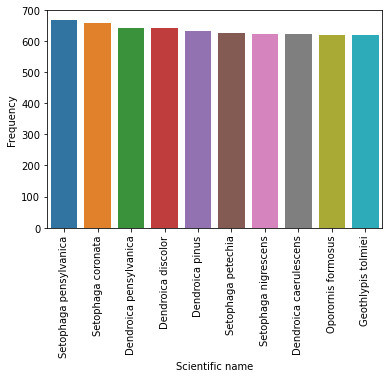

In [34]:
animals['is_warbler'] = animals.common_names.str.contains(r"\bWarbler\b", regex = True)
common_animals_warbler = animals[animals['is_warbler']==True].groupby(by='scientific_name', as_index=False).sum().sort_values('observations',ascending=False).reset_index(drop=True).head(10)
display(common_animals_warbler)

sns.barplot(data=common_animals_warbler, x='scientific_name', y='observations')
plt.xlabel('Scientific name')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

In [35]:
animals.scientific_name.nunique()

946

In [36]:
animals.common_names[animals.scientific_name=='Setophaga pensylvanica'].unique()

array(['Chestnut-Sided Warbler'], dtype=object)

946 different animal species are observed in these four parks (4,740 notes). Most of the spotted animals correlate with North - as many as 260 of them have word 'Northern' in their scientific name. Second most freuqent name is 'Warbler'. Bird called 'Setophaga pensylvanica' was spotted 667 times in 4 parks. Common name for this animal is 'Chestnut-Sided Warbler'.

### Species under protection

In [37]:
observations_cat.conservation_status.fillna('None', inplace=True)

In [38]:
observations_cat['under_protection'] = observations_cat.conservation_status.apply(lambda x: x!='None')
observations_cat

,scientific_name,park_name,observations,category,common_names,conservation_status,under_protection
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",None,False
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",None,False
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",None,False
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",None,False
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,None,False
...,...,...,...,...,...,...,...
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,None,False
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",None,False
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",None,False
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",None,False


In [39]:
under_protection = observations_cat.groupby(by=['category', 'under_protection']).scientific_name.count().reset_index().rename(columns={'scientific_name': 'number'})

In [40]:
s = under_protection.groupby('category')['number'].sum().reset_index().rename(columns={'number': 'sum'})
under_protection = under_protection.merge(s)
under_protection

,category,under_protection,number,sum
0,Amphibian,False,300,328
1,Amphibian,True,28,328
2,Bird,False,2016,2364
3,Bird,True,348,2364
4,Fish,False,476,524
5,Fish,True,48,524
6,Mammal,False,968,1200
7,Mammal,True,232,1200
8,Nonvascular Plant,False,1312,1332
9,Nonvascular Plant,True,20,1332


In [41]:
under_protection['percentage'] = round(under_protection['number']/under_protection['sum']*100,1)
under_protection

,category,under_protection,number,sum,percentage
0,Amphibian,False,300,328,91.5
1,Amphibian,True,28,328,8.5
2,Bird,False,2016,2364,85.3
3,Bird,True,348,2364,14.7
4,Fish,False,476,524,90.8
5,Fish,True,48,524,9.2
6,Mammal,False,968,1200,80.7
7,Mammal,True,232,1200,19.3
8,Nonvascular Plant,False,1312,1332,98.5
9,Nonvascular Plant,True,20,1332,1.5


Considering different categories, the most animals under protection are mammals - almost 20%. Also, almost 15% of bird species are endengered. In the remaining categories, less than 10% of animals are under careful observation: 9.2% of fishes, 8.5% of amphibians and  6.2% of reptiles. Then, there are 1.5% of nonvascular plants and only 0.9% of vascular plants that are considered endengered.

In [42]:
only_under_protection = observations_cat[observations_cat.under_protection==True]
only_under_protection

,scientific_name,park_name,observations,category,common_names,conservation_status,under_protection
120,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern,True
121,Zizia trifoliata,Yellowstone National Park,238,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern,True
122,Zizia trifoliata,Bryce National Park,87,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern,True
123,Zizia trifoliata,Great Smoky Mountains National Park,80,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern,True
204,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern,True
...,...,...,...,...,...,...,...
25271,Lophocolea appalachiana,Yosemite National Park,129,Nonvascular Plant,Appalachian Lophocolea,Species of Concern,True
25604,Sium suave,Great Smoky Mountains National Park,40,Vascular Plant,"Common Waterparsnip, Hemlock Waterparsnip, Hem...",Species of Concern,True
25605,Sium suave,Bryce National Park,117,Vascular Plant,"Common Waterparsnip, Hemlock Waterparsnip, Hem...",Species of Concern,True
25606,Sium suave,Yellowstone National Park,211,Vascular Plant,"Common Waterparsnip, Hemlock Waterparsnip, Hem...",Species of Concern,True


In [43]:
common_names_under_prot = find_common_names(only_under_protection)
display(common_names_under_prot.head(10))

,name,occurrence
0,Myotis,92
1,Bat,80
2,Brown,60
3,Gray,44
4,Wolf,40
5,Little,36
6,Northern,28
7,American,28
8,Black,28
9,California,28


Talking only about species under protection, the most freaquent observed species names contains words 'myotis' and 'bat', both describing a genus of mammal, colloquially called just 'bat'. Next, popular words in species names are 'brown' and 'gray', which are correlated with the appearance.

In [44]:
only_under_protection['is_bat'] = only_under_protection.common_names.str.contains(r"\bMyotis\b", regex = True) + only_under_protection.common_names.str.contains(r"\bBat\b", regex = True)
only_under_protection[only_under_protection['is_bat']==True]

C:\Users\Martyna\AppData\Local\Temp\ipykernel_20760\1651090445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_under_protection['is_bat'] = only_under_protection.common_names.str.contains(r"\bMyotis\b", regex = True) + only_under_protection.common_names.str.contains(r"\bBat\b", regex = True)


,scientific_name,park_name,observations,category,common_names,conservation_status,under_protection,is_bat
1348,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1349,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
1350,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
1351,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
5080,Myotis californicus,Yosemite National Park,148,Mammal,"California Myotis, California Myotis, Californ...",Species of Concern,True,True
...,...,...,...,...,...,...,...,...
21155,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
23392,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
23393,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
23394,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [45]:
only_under_protection[only_under_protection['is_bat']==True].scientific_name.nunique()

17

,scientific_name,observations,under_protection,is_bat
0,Myotis lucifugus,4641,36,36
1,Myotis californicus,2214,16,16
2,Eptesicus fuscus,2094,16,16
3,Lasionycteris noctivagans,2038,16,16
4,Myotis austroriparius,568,4,4
5,Myotis yumanensis,538,4,4
6,Myotis volans,537,4,4
7,Lasiurus blossevillii,527,4,4
8,Myotis evotis,524,4,4
9,Myotis thysanodes,515,4,4


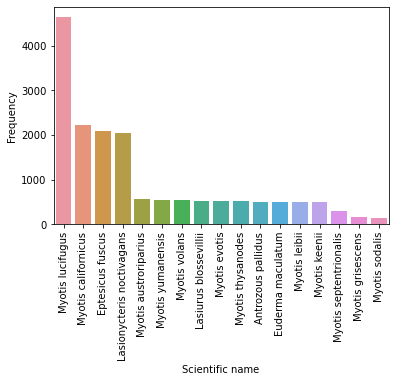

In [46]:
common_bats = only_under_protection[only_under_protection['is_bat']==True].groupby(by='scientific_name', as_index=False).sum().sort_values('observations',ascending=False).reset_index(drop=True)
display(common_bats)

sns.barplot(data=common_bats, x='scientific_name', y='observations')
plt.xlabel('Scientific name')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.show()

There are 17 different bat species that are under protection (considered as endengered). Species 'Myotis lucifugus' was observed 4641 times (most frequent). Then species 'Myotis californicus', 'Eptesicus fuscus' and 'Lasionycteris noctivagans' were spotted 2214, 2094 and 2038 times, respectively. Remaining species were observed less than 600 times.

### Species under protection in Parks

In [47]:
only_under_protection = observations_cat[observations_cat.under_protection==True]

parks = observations.park_name.unique().tolist()
parks

['Great Smoky Mountains National Park',
 'Yosemite National Park',
 'Bryce National Park',
 'Yellowstone National Park']

In [48]:
for park in parks:
    print(park)
    under_protection_park = only_under_protection[only_under_protection.park_name==park]
    common_names = find_common_names(under_protection_park)
    display(common_names.head(3))
    under_protection_park['is_bat'] = under_protection_park.common_names.str.contains(r"\bMyotis\b", regex = True) + under_protection_park.common_names.str.contains(r"\bBat\b", regex = True)
    common_bats = under_protection_park[under_protection_park['is_bat']==True].groupby(by='scientific_name', as_index=False).sum().sort_values('observations',ascending=False).reset_index(drop=True)
    display(common_bats.head(3))
    print()

Great Smoky Mountains National Park


,name,occurrence
0,Myotis,23
1,Bat,20
2,Brown,15


C:\Users\Martyna\AppData\Local\Temp\ipykernel_20760\2534371110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_protection_park['is_bat'] = under_protection_park.common_names.str.contains(r"\bMyotis\b", regex = True) + under_protection_park.common_names.str.contains(r"\bBat\b", regex = True)


,scientific_name,observations,under_protection,is_bat
0,Myotis lucifugus,522,9,9
1,Myotis californicus,318,4,4
2,Eptesicus fuscus,292,4,4



Yosemite National Park


,name,occurrence
0,Myotis,23
1,Bat,20
2,Brown,15


C:\Users\Martyna\AppData\Local\Temp\ipykernel_20760\2534371110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_protection_park['is_bat'] = under_protection_park.common_names.str.contains(r"\bMyotis\b", regex = True) + under_protection_park.common_names.str.contains(r"\bBat\b", regex = True)


,scientific_name,observations,under_protection,is_bat
0,Myotis lucifugus,1188,9,9
1,Myotis californicus,562,4,4
2,Lasionycteris noctivagans,532,4,4



Bryce National Park


,name,occurrence
0,Myotis,23
1,Bat,20
2,Brown,15


C:\Users\Martyna\AppData\Local\Temp\ipykernel_20760\2534371110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_protection_park['is_bat'] = under_protection_park.common_names.str.contains(r"\bMyotis\b", regex = True) + under_protection_park.common_names.str.contains(r"\bBat\b", regex = True)


,scientific_name,observations,under_protection,is_bat
0,Myotis lucifugus,894,9,9
1,Myotis californicus,474,4,4
2,Lasionycteris noctivagans,456,4,4



Yellowstone National Park


,name,occurrence
0,Myotis,23
1,Bat,20
2,Brown,15


C:\Users\Martyna\AppData\Local\Temp\ipykernel_20760\2534371110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_protection_park['is_bat'] = under_protection_park.common_names.str.contains(r"\bMyotis\b", regex = True) + under_protection_park.common_names.str.contains(r"\bBat\b", regex = True)


,scientific_name,observations,under_protection,is_bat
0,Myotis lucifugus,2037,9,9
1,Eptesicus fuscus,926,4,4
2,Lasionycteris noctivagans,900,4,4


'Myotis lucifugus' is the most frequent observed species under protection in each park.